In [1]:
def print_df(df):
    print(df.to_string(index=False))

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]
rows = []
club_links = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols_text = [col.text.strip() for col in cols]
    cols_text[-1] = '-'.join(cols_text[-1].split()) 
    club_link = row.find('a')['href']
    cols_text.insert(1, f"https://www.jleague.co{club_link}")
    club_links.append(f"https://www.jleague.co{club_link}")
    rows.append(cols_text)

    
headers.insert(1, 'Link')
df = pd.DataFrame(rows, columns=headers)
df.rename(columns={'CLUB': 'Team Name', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
df['Team Name'] = df['Team Name'].replace('Yokohama F･Marinos', 'Yokohama F.Marinos')
print_df(df)


Position                                                     Link                  Team Name  P  W D  L GF GA  GD Points      Form
       1          https://www.jleague.co/clubs/FC-Machida-Zelvia/          FC Machida Zelvia 17 11 2  4 28 15  13     35 D-W-W-W-L
       2            https://www.jleague.co/clubs/Kashima-Antlers/            Kashima Antlers 17 11 2  4 30 19  11     35 D-W-W-W-W
       3                https://www.jleague.co/clubs/Gamba-Osaka/                Gamba Osaka 17  9 4  4 17 12   5     31 W-D-W-W-W
       4                https://www.jleague.co/clubs/Vissel-Kobe/                Vissel Kobe 17  9 3  5 25 13  12     30 W-W-L-L-D
       5        https://www.jleague.co/clubs/Sanfrecce-Hiroshima/        Sanfrecce Hiroshima 16  6 8  2 28 15  13     26 L-L-W-D-W
       6                   https://www.jleague.co/clubs/FC-TOKYO/                   FC Tokyo 17  7 5  5 27 25   2     26 D-L-D-L-W
       7             https://www.jleague.co/clubs/Nagoya-Grampus/             Nagoy

In [3]:
df.dtypes

Position     object
Link         object
Team Name    object
P            object
W            object
D            object
L            object
GF           object
GA           object
GD           object
Points       object
Form         object
dtype: object

In [4]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Position'] = df['Position'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)
df['Team Name'] = df['Team Name'].astype(str)
df['Form'] = df['Form'].astype(str)

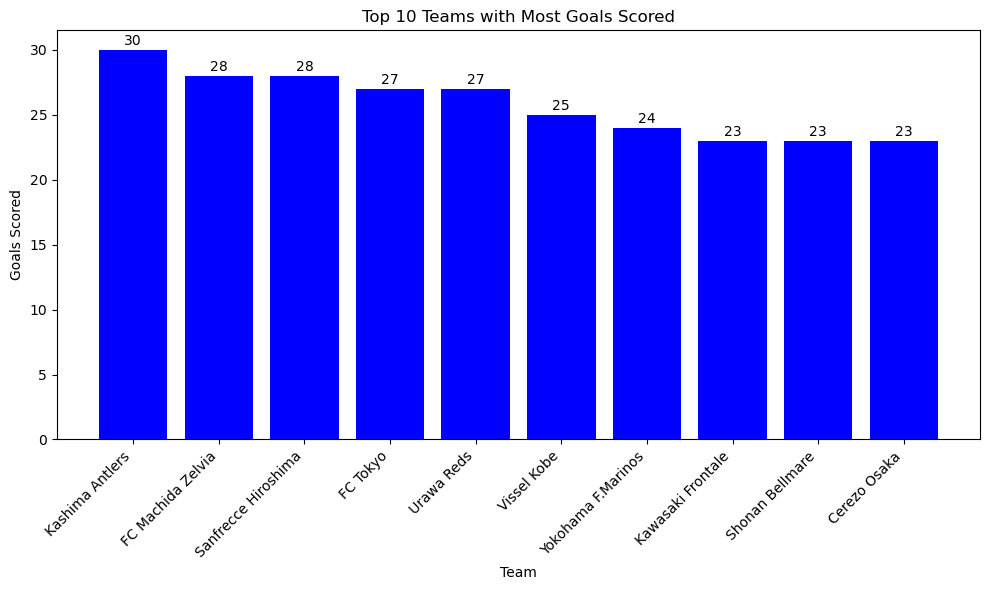

In [5]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Team Name'], top_scorers['GF'], color='blue')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Teams with Most Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for index, value in enumerate(top_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center', va='bottom')
plt.show()


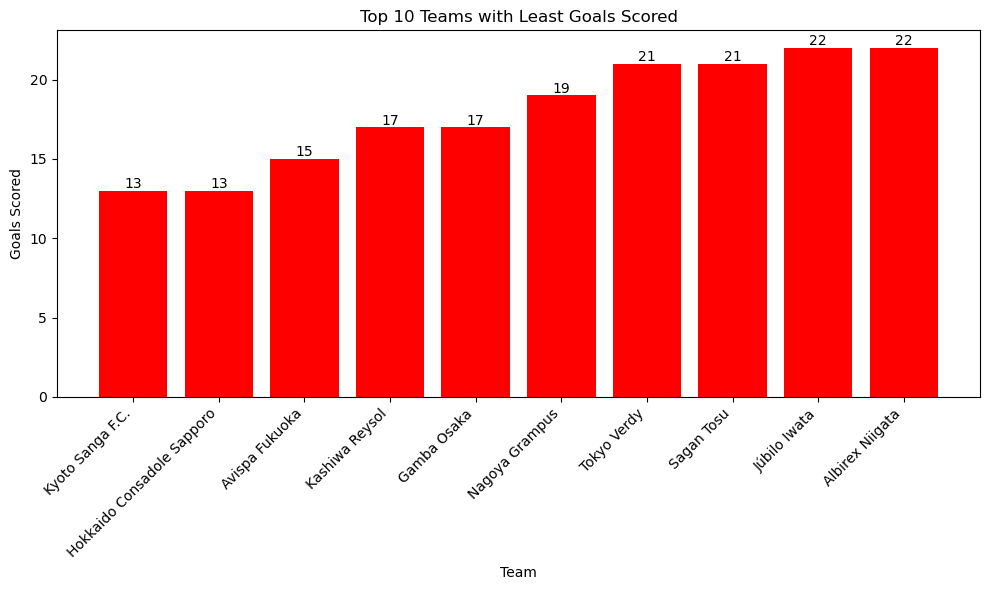

In [6]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(less_scorers['Team Name'], less_scorers['GF'], color = 'red')
for index, value in enumerate(less_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
grouped = df.groupby('GF')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Scored', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Scored  Count of Teams                                       Team Names
                 30               1                                  Kashima Antlers
                 28               2           FC Machida Zelvia, Sanfrecce Hiroshima
                 27               2                             FC Tokyo, Urawa Reds
                 25               1                                      Vissel Kobe
                 24               1                               Yokohama F.Marinos
                 23               3 Cerezo Osaka, Kawasaki Frontale, Shonan Bellmare
                 22               2                    Albirex Niigata, Júbilo Iwata
                 21               2                          Tokyo Verdy, Sagan Tosu
                 19               1                                   Nagoya Grampus
                 17               2                      Gamba Osaka, Kashiwa Reysol
                 15               1                              

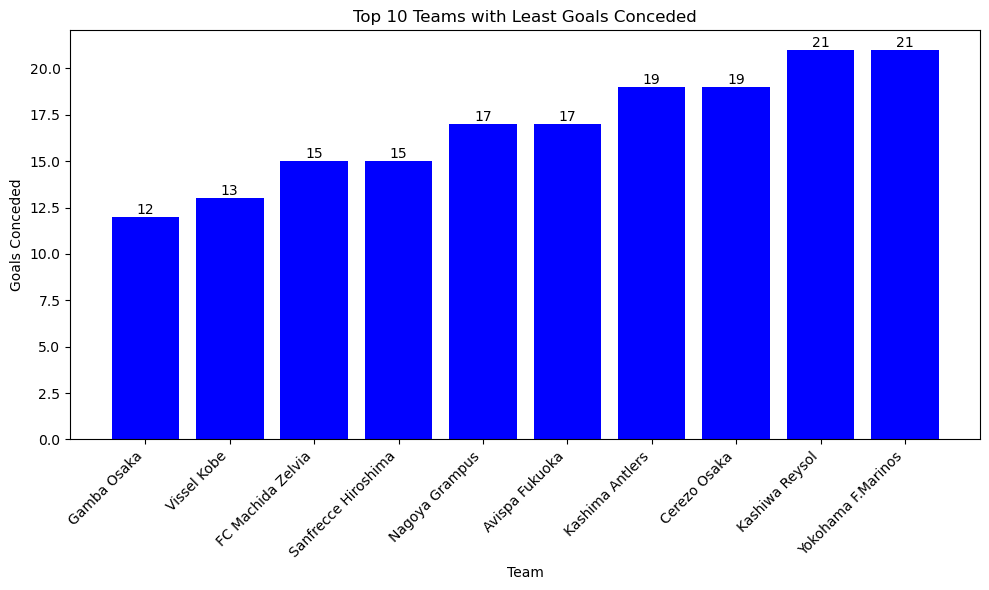

In [8]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(best_defense['Team Name'], best_defense['GA'], color = 'blue')
for index, value in enumerate(best_defense['GA']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

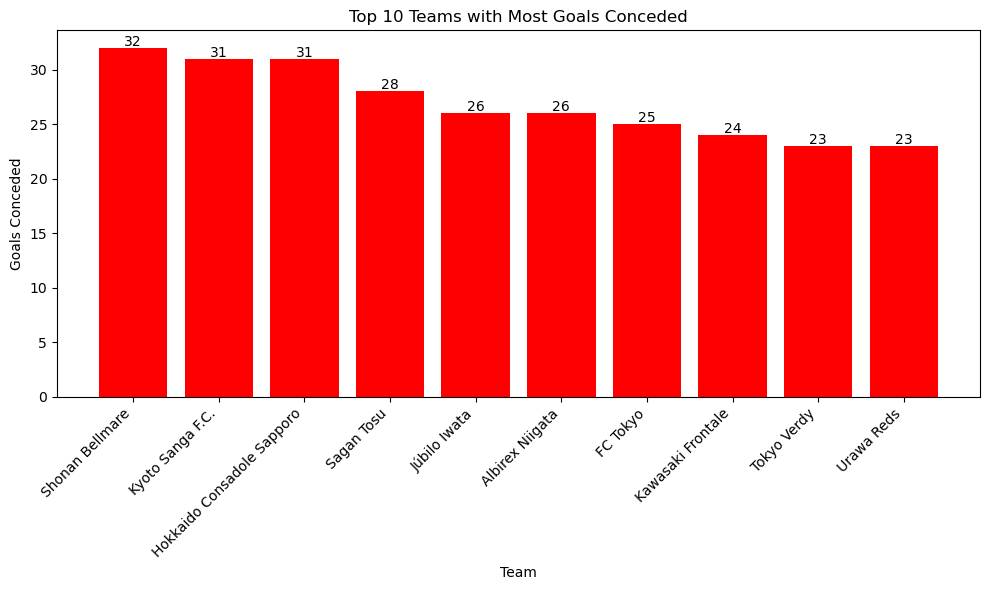

In [9]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(worst_defense['Team Name'], worst_defense['GA'], color = 'red')
for index, value in enumerate(worst_defense['GA']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.title('Top 10 Teams with Most Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
grouped = df.groupby('GA')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Conceded', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Conceded  Count of Teams                                   Team Names
                   12               1                                  Gamba Osaka
                   13               1                                  Vissel Kobe
                   15               2       FC Machida Zelvia, Sanfrecce Hiroshima
                   17               2               Nagoya Grampus, Avispa Fukuoka
                   19               2                Kashima Antlers, Cerezo Osaka
                   21               2           Kashiwa Reysol, Yokohama F.Marinos
                   23               2                      Urawa Reds, Tokyo Verdy
                   24               1                            Kawasaki Frontale
                   25               1                                     FC Tokyo
                   26               2                Albirex Niigata, Júbilo Iwata
                   28               1                                   Sagan Tosu
    

In [11]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Team Name', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print_df(l5p)


 Position                  Team Name  Points over the last 5 games
        3                Gamba Osaka                            13
        2            Kashima Antlers                            13
        1          FC Machida Zelvia                            10
        7             Nagoya Grampus                            10
       12                Tokyo Verdy                             8
        8                 Urawa Reds                             8
       11             Kashiwa Reysol                             8
       10             Avispa Fukuoka                             7
        5        Sanfrecce Hiroshima                             7
        4                Vissel Kobe                             7
       14            Albirex Niigata                             6
       17                 Sagan Tosu                             6
        6                   FC Tokyo                             5
        9               Cerezo Osaka                          

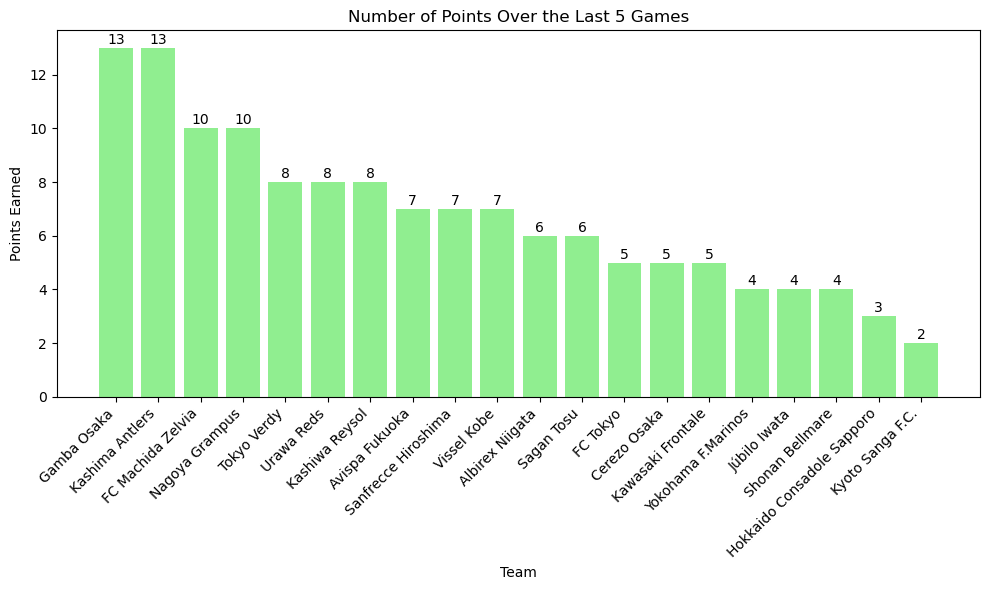

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(l5p['Team Name'], l5p['Points over the last 5 games'], color = 'lightgreen')
for index, value in enumerate(l5p['Points over the last 5 games']):
    plt.text(index,value + 0.15, str(value), ha='center')
plt.title('Number of Points Over the Last 5 Games')
plt.xlabel('Team')
plt.ylabel('Points Earned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

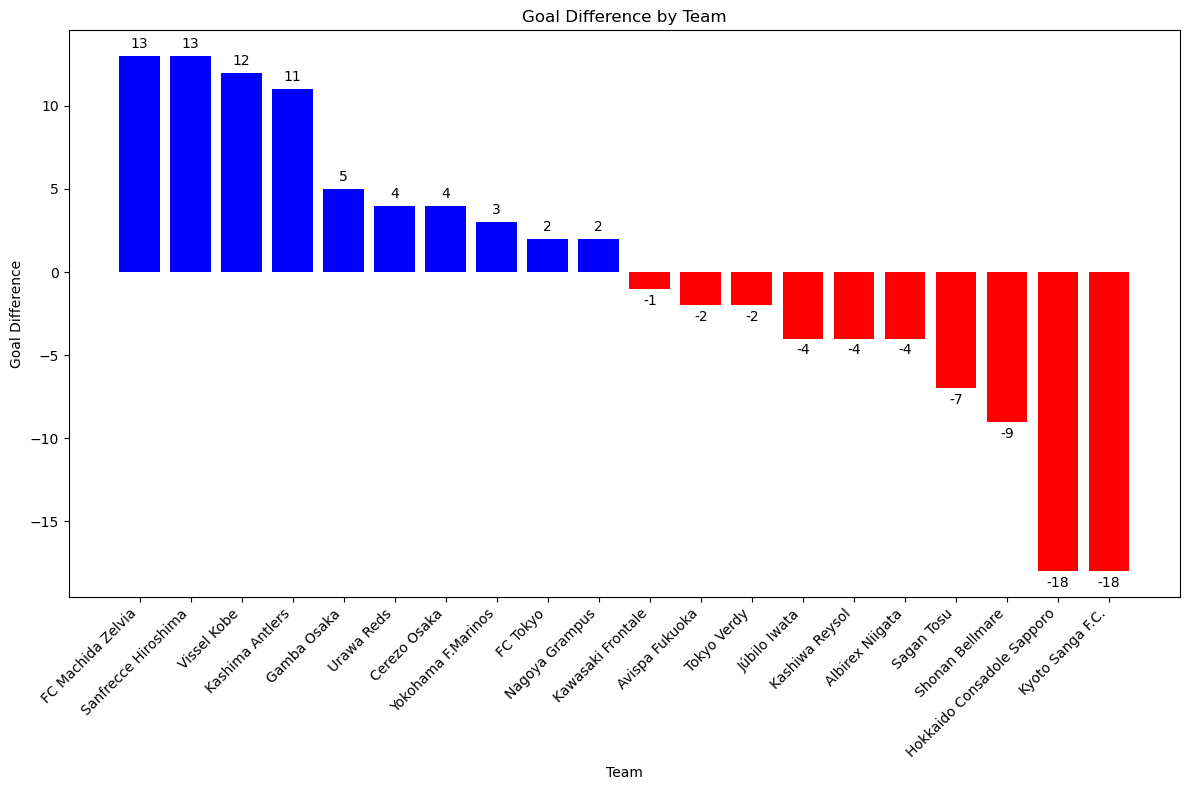

In [13]:
df2 = df.sort_values(by='GD', ascending=False)
colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]
plt.figure(figsize=(12,8))
bars = plt.bar(df2['Team Name'], df2['GD'], color=colors)
for bar, value in zip(bars, df2['GD']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3 if value >= 0 else bar.get_height() - 0.3,
             str(value), ha='center', va='bottom' if value >= 0 else 'top')
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
grouped = df.groupby('GD')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Goal Difference', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Goal Difference', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Goal Difference  Count of Teams                                    Team Names
              13               2        FC Machida Zelvia, Sanfrecce Hiroshima
              12               1                                   Vissel Kobe
              11               1                               Kashima Antlers
               5               1                                   Gamba Osaka
               4               2                      Urawa Reds, Cerezo Osaka
               3               1                            Yokohama F.Marinos
               2               2                      FC Tokyo, Nagoya Grampus
              -1               1                             Kawasaki Frontale
              -2               2                   Avispa Fukuoka, Tokyo Verdy
              -4               3 Kashiwa Reysol, Albirex Niigata, Júbilo Iwata
              -7               1                                    Sagan Tosu
              -9               1                    

In [15]:
grouped = df.groupby('Points')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Points', 'Count of Teams', 'Team Names']
grouped = grouped.sort_values(by='Total Points', ascending=False).reset_index(drop=True)
print_df(grouped)

 Total Points  Count of Teams                                    Team Names
           35               2            FC Machida Zelvia, Kashima Antlers
           31               1                                   Gamba Osaka
           30               1                                   Vissel Kobe
           26               3 Sanfrecce Hiroshima, FC Tokyo, Nagoya Grampus
           25               2                      Urawa Reds, Cerezo Osaka
           22               2                Avispa Fukuoka, Kashiwa Reysol
           21               1                                   Tokyo Verdy
           20               1                            Yokohama F.Marinos
           19               1                               Albirex Niigata
           18               1                                  Júbilo Iwata
           17               1                             Kawasaki Frontale
           14               2                   Sagan Tosu, Shonan Bellmare
           1

In [16]:
df['Points Per Game'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='Points Per Game', ascending=False)

df_sorted = df_sorted[['Position','Team Name', 'Points Per Game']]

print_df(df_sorted)

 Position                  Team Name  Points Per Game
        1          FC Machida Zelvia         2.058824
        2            Kashima Antlers         2.058824
        3                Gamba Osaka         1.823529
        4                Vissel Kobe         1.764706
        5        Sanfrecce Hiroshima         1.625000
        7             Nagoya Grampus         1.625000
        6                   FC Tokyo         1.529412
        8                 Urawa Reds         1.470588
        9               Cerezo Osaka         1.470588
       11             Kashiwa Reysol         1.375000
       10             Avispa Fukuoka         1.375000
       13         Yokohama F.Marinos         1.333333
       12                Tokyo Verdy         1.312500
       14            Albirex Niigata         1.117647
       16          Kawasaki Frontale         1.062500
       15               Júbilo Iwata         1.058824
       17                 Sagan Tosu         0.875000
       18            Shonan 